<a href="https://colab.research.google.com/github/NinaAbeyratne/ML_CW_Census_Income/blob/main/Data_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

### Importing Libraries

In [28]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

### Importing the dataset

In [3]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
features = adult.data.features
target = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### Combining the Dataset

In [4]:
# variable information
features["income"] = target

#Dataset into a DataFrame

In [5]:
df_features = pd.DataFrame(features)
df_features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
# checking the number of rows
num_rows = features.shape[0]
print("Number of rows:", num_rows)

Number of rows: 48842


# Analysing the Dataset

In [7]:
#Dataset Structure
print("Dataset Shape:", features.shape)
print("Columns:", features.columns)
print()

Dataset Shape: (48842, 15)
Columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')



# Visualizing the Data Distribution

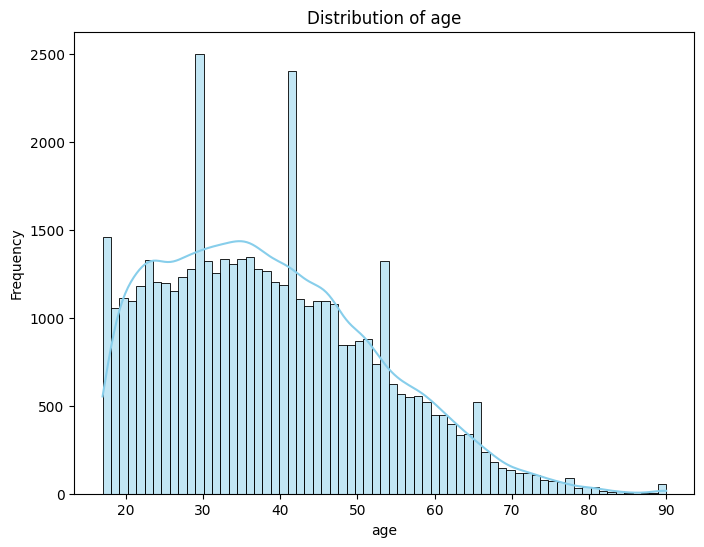

<ipython-input-8-b85614c4af40>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_features, x=feature['name'], palette='Set2')


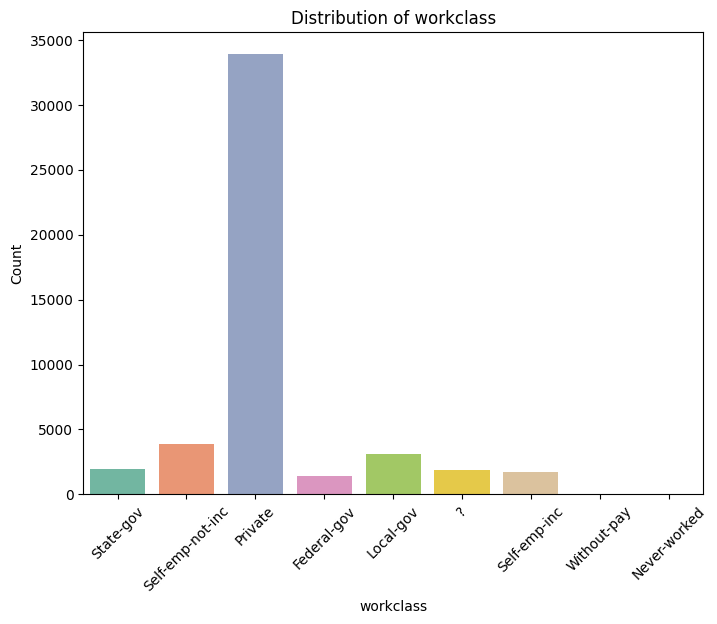

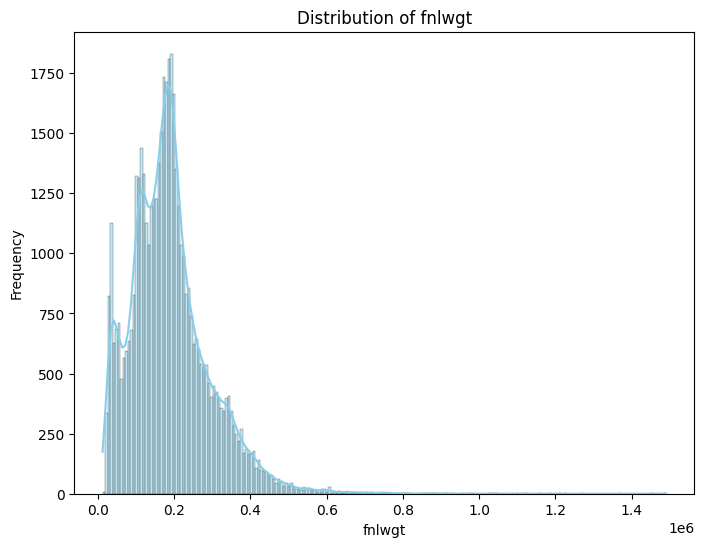

<ipython-input-8-b85614c4af40>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_features, x=feature['name'], palette='Set2')


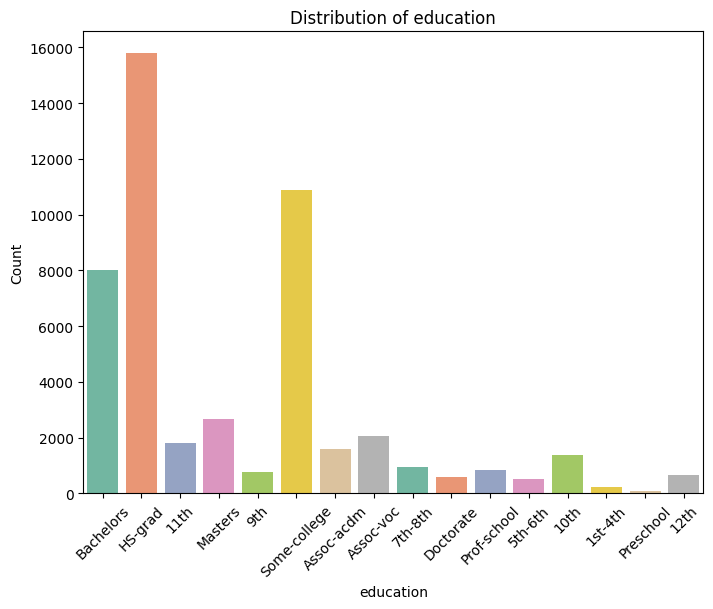

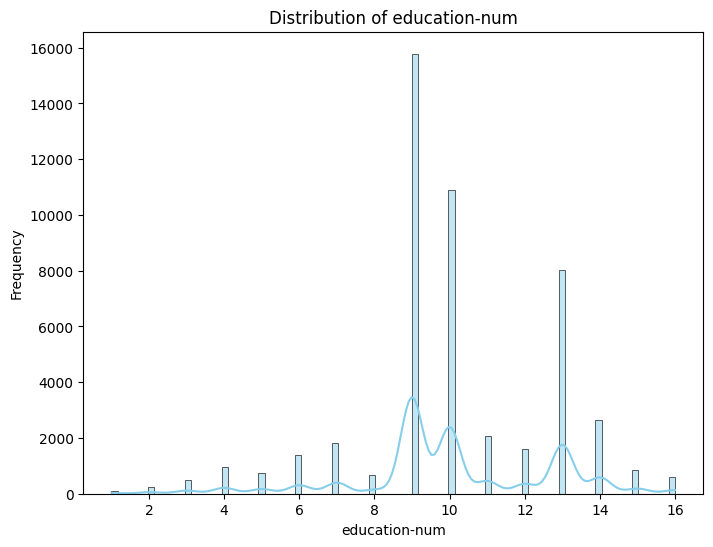

<ipython-input-8-b85614c4af40>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_features, x=feature['name'], palette='Set2')


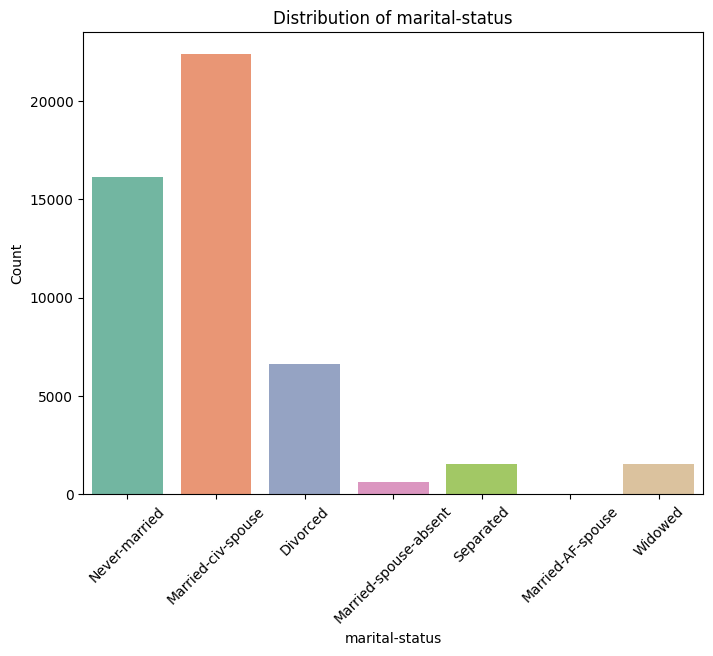

<ipython-input-8-b85614c4af40>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_features, x=feature['name'], palette='Set2')


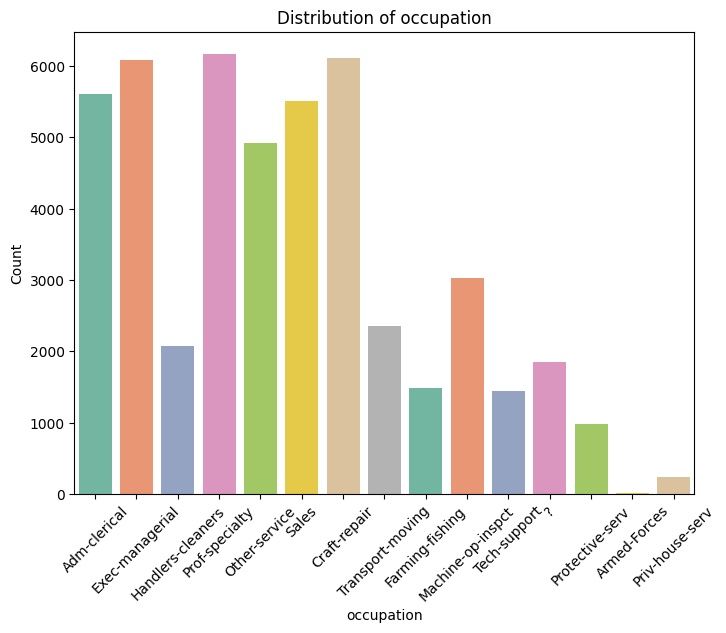

<ipython-input-8-b85614c4af40>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_features, x=feature['name'], palette='Set2')


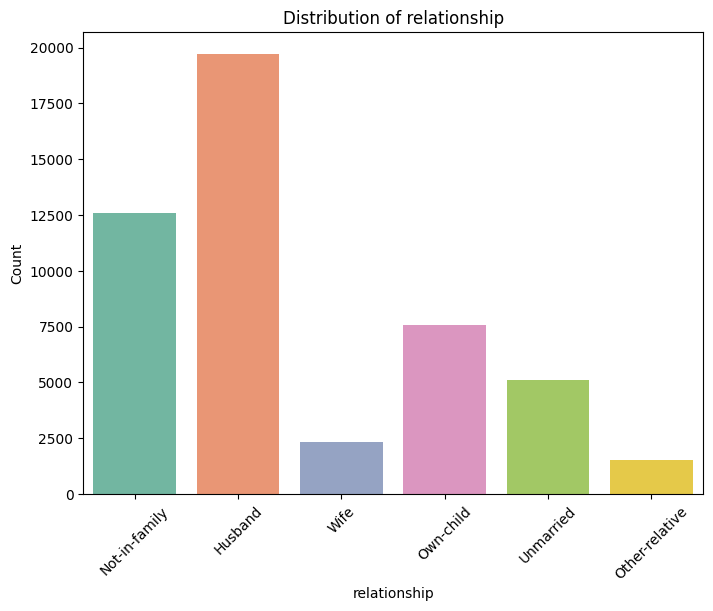

<ipython-input-8-b85614c4af40>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_features, x=feature['name'], palette='Set2')


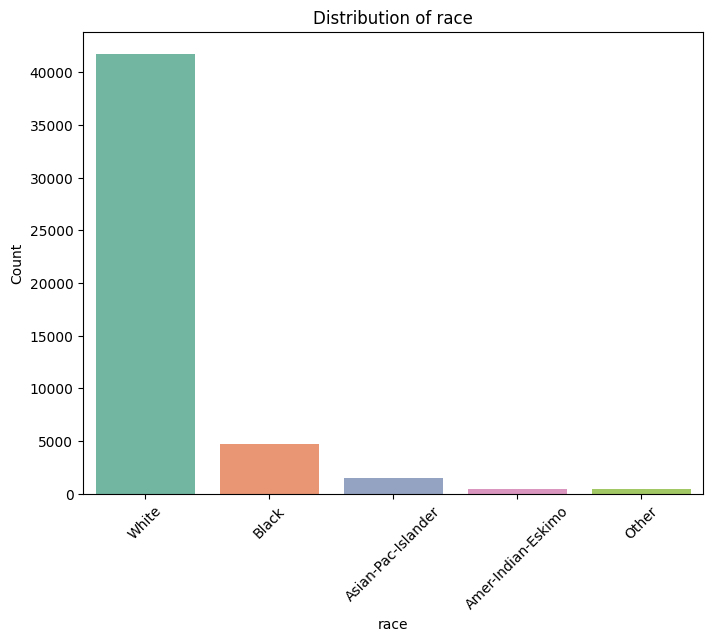

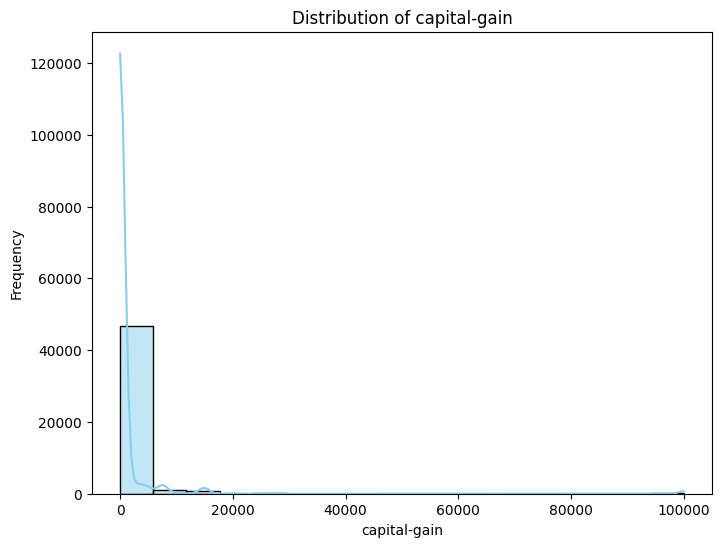

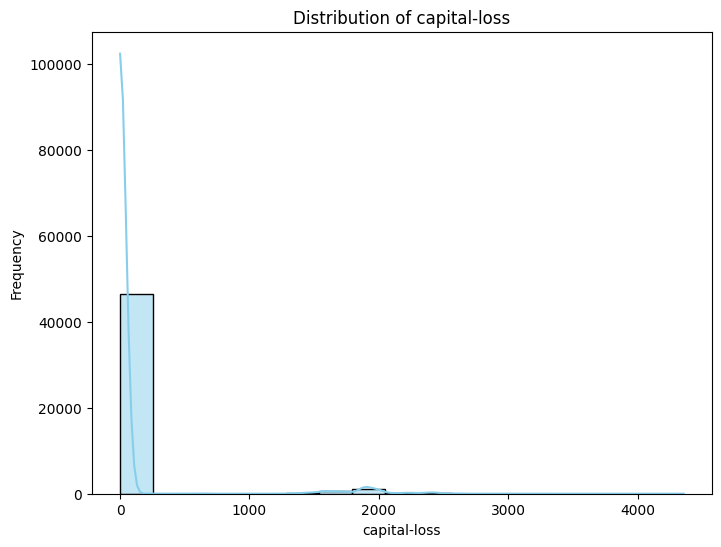

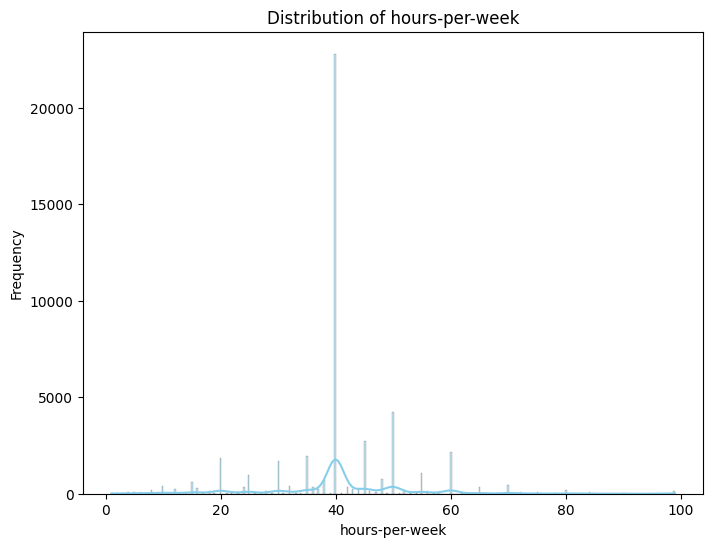

<ipython-input-8-b85614c4af40>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_features, x=feature['name'], palette='Set2')


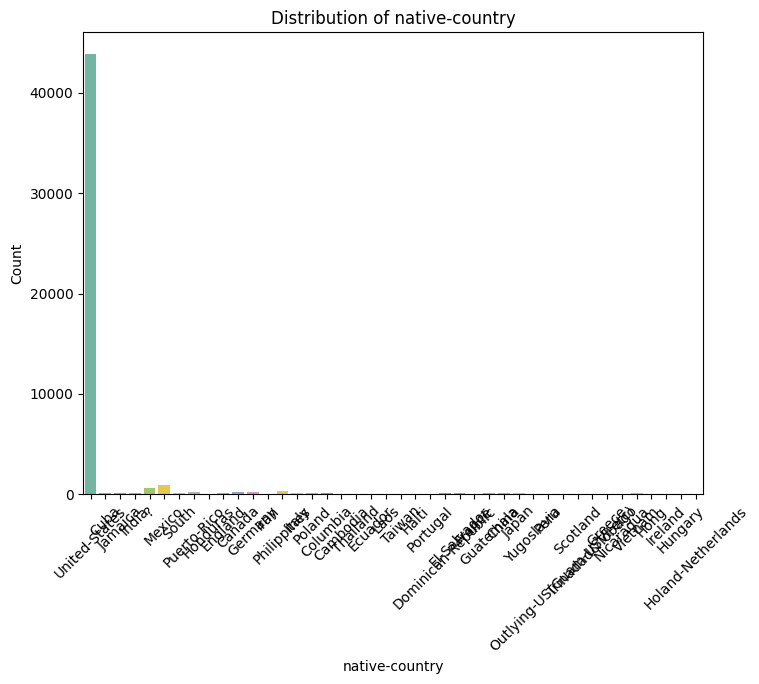

In [8]:
# List of features and types
features = [
    {'name': 'age', 'type': 'Integer'},
    {'name': 'workclass', 'type': 'Categorical'},
    {'name': 'fnlwgt', 'type': 'Integer'},
    {'name': 'education', 'type': 'Categorical'},
    {'name': 'education-num', 'type': 'Integer'},
    {'name': 'marital-status', 'type': 'Categorical'},
    {'name': 'occupation', 'type': 'Categorical'},
    {'name': 'relationship', 'type': 'Categorical'},
    {'name': 'race', 'type': 'Categorical'},
    {'name': 'sex', 'type': 'Binary'},
    {'name': 'capital-gain', 'type': 'Integer'},
    {'name': 'capital-loss', 'type': 'Integer'},
    {'name': 'hours-per-week', 'type': 'Integer'},
    {'name': 'native-country', 'type': 'Categorical'},
    {'name': 'income', 'type': 'Binary'}
]

# Distribution of Features
for feature in features:
    if feature['type'] == 'Integer':
        plt.figure(figsize=(8, 6))
        sns.histplot(df_features[feature['name']], kde=True, color='skyblue')
        plt.title(f'Distribution of {feature["name"]}')
        plt.xlabel(feature['name'])
        plt.ylabel('Frequency')
        plt.show()
    elif feature['type'] == 'Categorical':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df_features, x=feature['name'], palette='Set2')
        plt.title(f'Distribution of {feature["name"]}')
        plt.xlabel(feature['name'])
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

## Unique Values

In [9]:
# checking unique values
for column in df_features.columns:
  p = df_features[column].unique()

  print("Column: ", column)
  print(p)
  print()

Column:  age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Column:  workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Column:  fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

Column:  education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Column:  education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Column:  marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Column:  occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-mov

### Target Variable

In [10]:
# Target Variable Distribution
print("Target Variable Distribution:")
print(df_features['income'].value_counts())
print()

Target Variable Distribution:
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64



## Replacing the . values with the original one

In [11]:
# Replace '<=50K.' with '<=50K' in the DataFrame
df_features.replace({'<=50K.': '<=50K'}, inplace=True)
df_features.replace({'>50K.': '>50K'}, inplace=True)

In [12]:
# Distribution of Target Variable
print("Target Variable Distribution:")
print(df_features['income'].value_counts())
print()

Target Variable Distribution:
<=50K    37155
>50K     11687
Name: income, dtype: int64



# Checking for missing data

In [13]:
# Check for missing data
missing_data = df_features.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data:")
print(missing_data[missing_data > 0])

Columns with Missing Data:
workclass         963
occupation        966
native-country    274
dtype: int64


In [14]:
# columns with ?
df_features.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### Replacing ? with NaN

In [15]:
# Replace "?" with NaN
df_features.replace("?", np.nan, inplace=True)

# Check for missing data again
missing_data = df_features.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data after replacing '?' with NaN:")
print(missing_data[missing_data > 0])

Columns with Missing Data after replacing '?' with NaN:
workclass         2799
occupation        2809
native-country     857
dtype: int64


# Checking for Duplicates

In [16]:
# Check for duplicates
duplicates = df_features.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 52


In [17]:
# Mark duplicates as True
duplicate_rows = df_features[df_features.duplicated(keep=False)]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
       age     workclass  fnlwgt     education  education-num  \
2195    39       Private  184659       HS-grad              9   
2303    90       Private   52386  Some-college             10   
3118    19       Private  130431       5th-6th              3   
3445    41       Private  116391     Bachelors             13   
3917    19       Private  251579  Some-college             10   
...    ...           ...     ...           ...            ...   
46959   19       Private  318822       HS-grad              9   
47048   31       Private  228873       HS-grad              9   
47399   43       Private  195258       HS-grad              9   
47884   23       Private  107882     Bachelors             13   
48521   18  Self-emp-inc  378036          12th              8   

           marital-status         occupation   relationship  \
2195   Married-civ-spouse  Machine-op-inspct        Husband   
2303        Never-married      Other-service  Not-in-family   
3118        Ne

## Deleting duplicates

In [18]:
# Keeping the first instance of each duplicate and removing the rest
df_features.drop_duplicates(keep='first', inplace=True)

In [19]:
# Check for duplicates again
duplicates = df_features.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [26]:
num_rows = df_features.shape[0]
print("Number of rows:", num_rows)

Number of rows: 48790


# Handling Missing Values

Since all the columns with missing values are object, can only use mode out of mean,median and mode

In [31]:
# Columns with missing values
columns_with_missing = ['workclass', 'occupation', 'native-country']

# Fill missing values using mode for each column
for col in columns_with_missing:
    if col == 'workclass':
        fill_value = df_features[col].mode()[0]
    elif col == 'occupation':
        fill_value = df_features[col].mode()[0]
    else:  # native-country
        fill_value = df_features[col].mode()[0]

    # Replace missing values with the mode
    df_features[col].fillna(fill_value, inplace=True)

df_features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [32]:
# Checking for missing data
missing_data = df_features.isnull().sum()

# Displaying columns with missing data
print("Columns with Missing Data:")
print(missing_data[missing_data > 0])

Columns with Missing Data:
Series([], dtype: int64)


In [33]:
# Checking for duplicates
duplicates = df_features.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 1


# Handling Outliers

### Check the datatype

In [34]:
# Data types of columns
data_types = df_features.dtypes

# Display data types
print(data_types)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


### detect outliers

In [35]:
# Defining a function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Numerical columns for outlier detection
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Detect outliers for each numerical column using IQR method
outliers_iqr = df_features[numerical_columns].apply(detect_outliers_iqr)

# Display outliers
print("Outliers detected using IQR method:")
print(outliers_iqr)

Outliers detected using IQR method:
         age  fnlwgt  education-num  capital-gain  capital-loss  \
0      False   False          False          True         False   
1      False   False          False         False         False   
2      False   False          False         False         False   
3      False   False          False         False         False   
4      False   False          False         False         False   
...      ...     ...            ...           ...           ...   
48837  False   False          False         False         False   
48838  False   False          False         False         False   
48839  False   False          False         False         False   
48840  False   False          False          True         False   
48841  False   False          False         False         False   

       hours-per-week  
0               False  
1                True  
2               False  
3               False  
4               False  
...            

### Sum of outliers

In [36]:
# Sum of outliers for each numerical column
outliers_sum_iqr = outliers_iqr.sum()

# Displaying sum of outliers for each column
print("Sum of outliers for each column (IQR method):")
print(outliers_sum_iqr)

Sum of outliers for each column (IQR method):
age                 215
fnlwgt             1453
education-num      1787
capital-gain       4035
capital-loss       2282
hours-per-week    13486
dtype: int64


### Visulaizing OUtliers

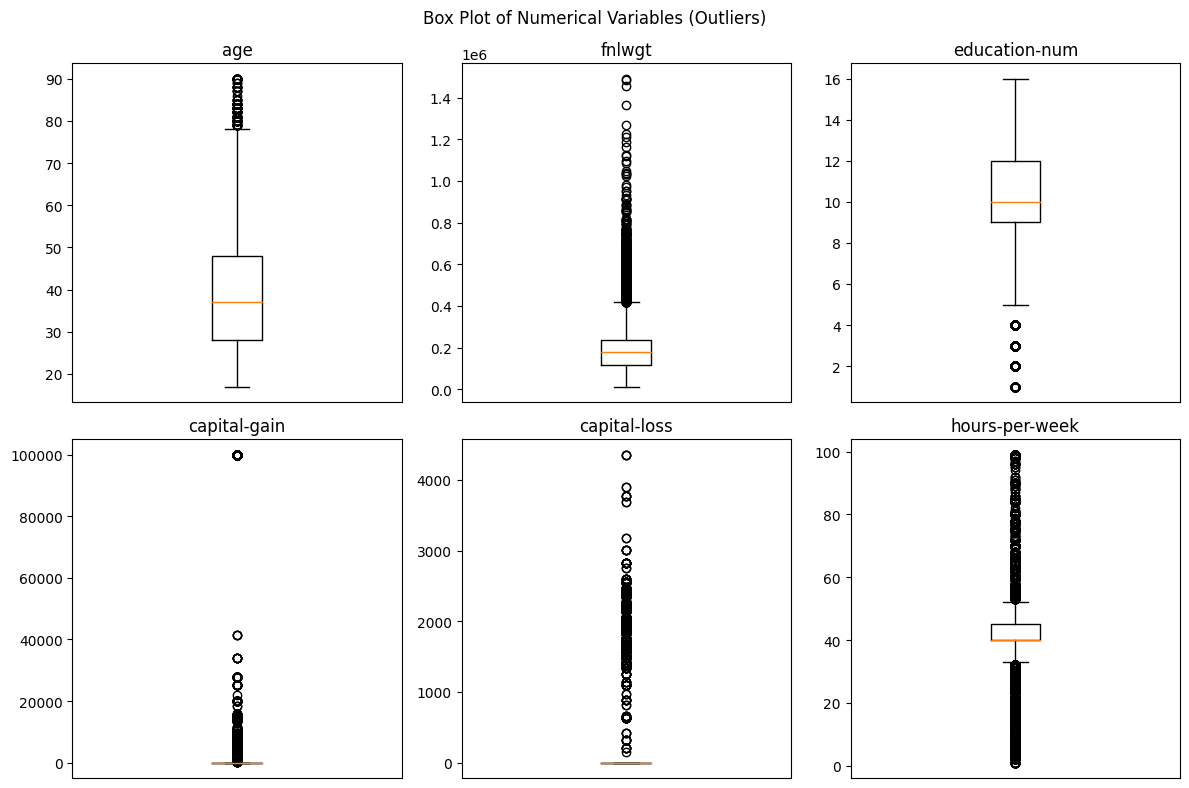

In [37]:
# List of numerical columns
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create a box plot for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df_features[column])
    plt.title(column)
    plt.xticks([])
plt.suptitle("Box Plot of Numerical Variables (Outliers)")
plt.tight_layout()
plt.show()

### Checking Statistics of Outliers

In [38]:
# Define the columns and their respective outlier counts
columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
outlier_counts = [215, 1453, 1787, 4035, 2282, 13486]

# Calculate summary statistics for each column with outliers
summary_statistics_with_outliers = {}
for col, count in zip(columns, outlier_counts):
    data = df_features[col]
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    data_range = np.ptp(data)
    summary_statistics_with_outliers[col] = {'Mean': mean, 'Median': median, 'Standard Deviation': std_dev, 'Range': data_range}

# Remove outliers from each column and calculate summary statistics again
summary_statistics_without_outliers = {}
for col in columns:
    data = df_features[col]
    outliers = outliers_iqr[col]
    data_no_outliers = data[~outliers]
    mean = np.mean(data_no_outliers)
    median = np.median(data_no_outliers)
    std_dev = np.std(data_no_outliers)
    data_range = np.ptp(data_no_outliers)
    summary_statistics_without_outliers[col] = {'Mean': mean, 'Median': median, 'Standard Deviation': std_dev, 'Range': data_range}

# Display summary statistics for each column with and without outliers
for col in columns:
    print(f"Column: {col}")
    print("Summary Statistics with Outliers:")
    print(summary_statistics_with_outliers[col])
    print("Summary Statistics without Outliers:")
    print(summary_statistics_without_outliers[col])
    print()

Column: age
Summary Statistics with Outliers:
{'Mean': 38.652797704447636, 'Median': 37.0, 'Standard Deviation': 13.708352412608862, 'Range': 73}
Summary Statistics without Outliers:
{'Mean': 38.45373134328358, 'Median': 37.0, 'Standard Deviation': 13.404424463090596, 'Range': 61}

Column: fnlwgt
Summary Statistics with Outliers:
{'Mean': 189668.9993646239, 'Median': 178138.5, 'Standard Deviation': 105616.14886093115, 'Range': 1478115}
Summary Statistics without Outliers:
{'Mean': 179681.78055221075, 'Median': 175804.0, 'Standard Deviation': 87627.85120784312, 'Range': 405383}

Column: education-num
Summary Statistics with Outliers:
{'Mean': 10.07880713260914, 'Median': 10.0, 'Standard Deviation': 2.5700196010232554, 'Range': 15}
Summary Statistics without Outliers:
{'Mean': 10.33629768312661, 'Median': 10.0, 'Standard Deviation': 2.239880749701412, 'Range': 11}

Column: capital-gain
Summary Statistics with Outliers:
{'Mean': 1080.21768805083, 'Median': 0.0, 'Standard Deviation': 7455.

The fact that there is not much of a difference in the mean or median between the datasets containing and lacking outliers suggests that outliers may not have a significant impact on the data's central tendency.

After eliminating outliers, the range and standard deviation slightly decline, suggesting a decrease in the variable nature of the data.

But there's only 215 outliers in age therefore outliers will be deelted.

Eliminate anomalies from the 'education-num' column to produce a dataset with a more constrained range and distribution of educational numbers. This suggests that the values are distributed more consistently around the centre values, with the overall spread being influenced by fewer extreme values.

### Deleting age outliers

In [39]:
# Calculate quartiles for 'age' column
Q1 = df_features['age'].quantile(0.25)
Q3 = df_features['age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the IQR method
outliers_age = (df_features['age'] < lower_bound) | (df_features['age'] > upper_bound)

# Filter the DataFrame to exclude rows containing outliers
df_features_no_outliers = df_features[~outliers_age]

# Verify the number of rows before and after removing outliers
print("Number of rows before removing outliers:", len(df_features))
print("Number of rows after removing outliers:", len(df_features_no_outliers))

# Delete the rows containing outliers from the original DataFrame
df_features.drop(df_features[outliers_age].index, inplace=True)

# Verify the number of rows after deleting outliers
print("Number of rows after deleting outliers:", len(df_features))


Number of rows before removing outliers: 48790
Number of rows after removing outliers: 48575
Number of rows after deleting outliers: 48575


### Checking correlation of Features

<ipython-input-40-a78b97668546>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_features.corr()


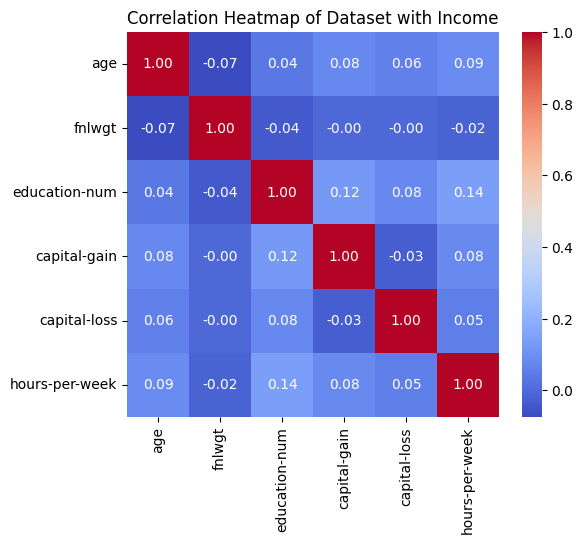

In [40]:
# Correlation matrix
corr_matrix = df_features.corr()

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dataset with Income')
plt.show()

# Grouping Categorical Values

### Workclass Grouping

In [41]:
# Mapping dictionary for grouping
workclass_mapping = {
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'Self-emp-not-inc': 'Private',
    'Self-emp-inc': 'Private',
    'Private': 'Private',
    'Without-pay': 'Other',
    'Never-worked': 'Other'
}

# Applying the mapping to create a new grouped column
df_features['workclass_group'] = df_features['workclass'].map(workclass_mapping)

In [42]:
# Check the distribution of the grouped workclass column
workclass_distribution = df_features['workclass_group'].value_counts()

# Display the distribution
print("Distribution of Workclass:")
print(workclass_distribution)

Distribution of Workclass:
Private       42012
Government     6532
Other            31
Name: workclass_group, dtype: int64


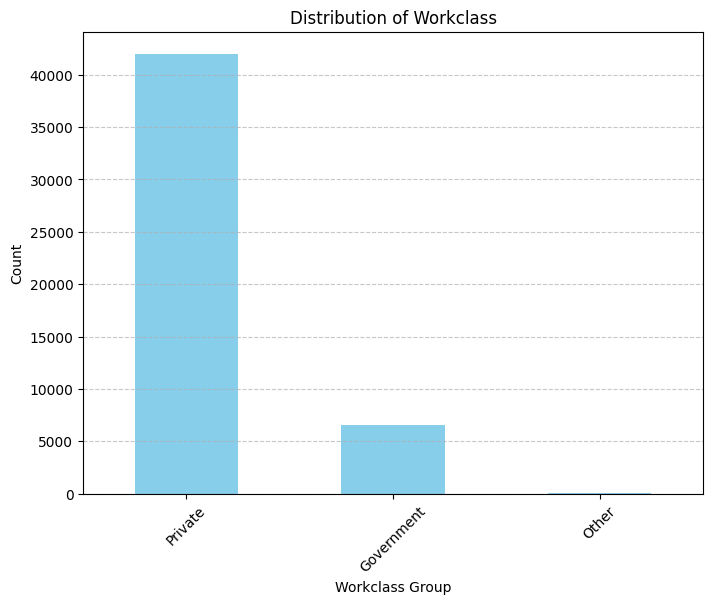

In [43]:
# Distribution of workclass
plt.figure(figsize=(8, 6))
workclass_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Workclass')
plt.xlabel('Workclass Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Education class Grouping

In [44]:
# Function to categorize education levels
def categorize_education(education_level):
    if education_level in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad']:
        return 'School'
    else:
        return 'Higher Education'

# Create a new column 'education_group'
df_features['education_group'] = df_features['education'].apply(categorize_education)

# Display the first few rows of the DataFrame with the new column
print(df_features[['education', 'education_group']].head())


   education   education_group
0  Bachelors  Higher Education
1  Bachelors  Higher Education
2    HS-grad            School
3       11th            School
4  Bachelors  Higher Education


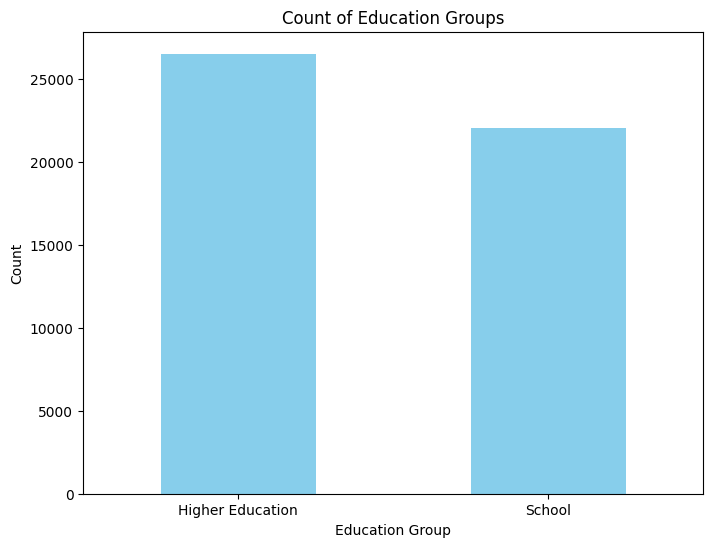

In [45]:
# Get the count of each group
education_group_count = df_features['education_group'].value_counts()

# Visualize the count
plt.figure(figsize=(8, 6))
education_group_count.plot(kind='bar', color='skyblue')
plt.title('Count of Education Groups')
plt.xlabel('Education Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Marital Status Grouping

In [46]:
# Function to group marital status
def group_marital_status(status):
    if status in ['Never-married', 'Divorced', 'Separated', 'Widowed']:
        return 'Not Married'
    else:
        return 'Married'

# Apply the function to create a new column 'marital_status_group'
df_features['marital_status_group'] = df_features['marital-status'].apply(group_marital_status)

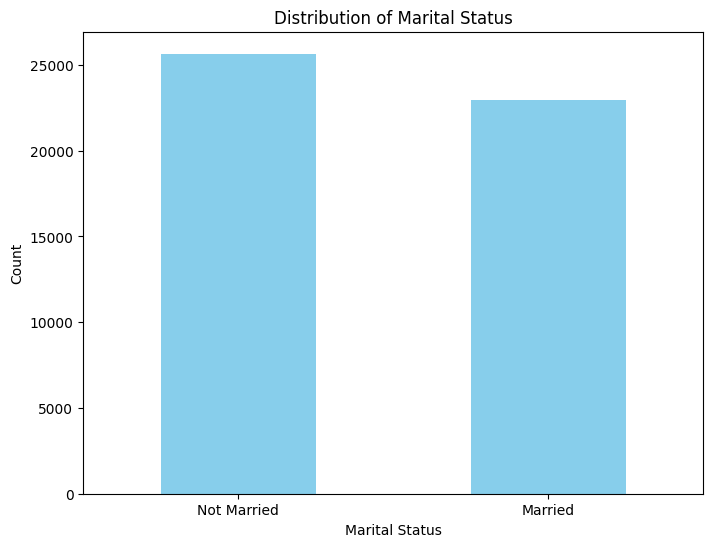

In [47]:
# Get the count of each group
marital_status_counts = df_features['marital_status_group'].value_counts()

# Visualize the count
plt.figure(figsize=(8, 6))
marital_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Relationship class Grouping

In [48]:
# Function to categorize relationship
def categorize_relationship(rel):
    if rel in ['Husband', 'Wife', 'Own-child', 'Other-relative']:
        return 'Family'
    else:
        return 'Not Family'

# Apply the function to create a new column
df_features['relationship_group'] = df_features['relationship'].apply(categorize_relationship)

Family        30999
Not Family    17576
Name: relationship_group, dtype: int64


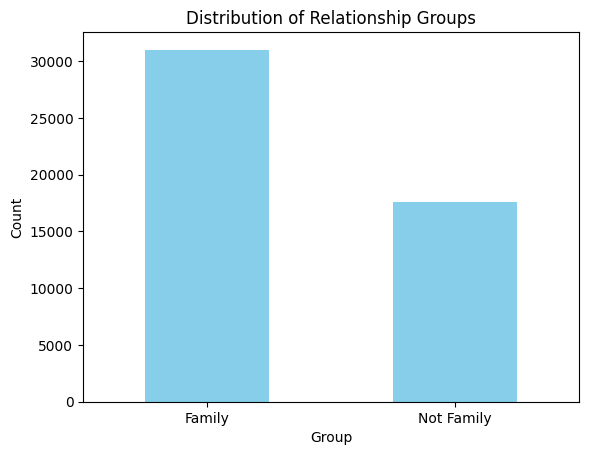

In [49]:
# Get the count of each group
relationship_count = df_features['relationship_group'].value_counts()

# Display the count
print(relationship_count)

# Plot the count
relationship_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Relationship Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Countries class Grouping

In [50]:
# Function to group countries into categories
def group_countries(country):
    if country in ['United-States', 'Canada', 'England', 'Germany', 'Italy', 'France', 'Scotland', 'Ireland']:
        return 'Western Countries'
    elif country in ['Mexico', 'Cuba', 'Jamaica', 'Puerto-Rico', 'Honduras', 'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Nicaragua', 'Haiti', 'Trinadad&Tobago']:
        return 'Latin American/Caribbean Countries'
    elif country in ['India', 'China', 'Philippines', 'Vietnam', 'Japan', 'Taiwan', 'Hong']:
        return 'Asian Countries'
    else:
        return 'Other Countries'

# Apply the function to create a new column with grouped categories
df_features['country_group'] = df_features['native-country'].apply(group_countries)

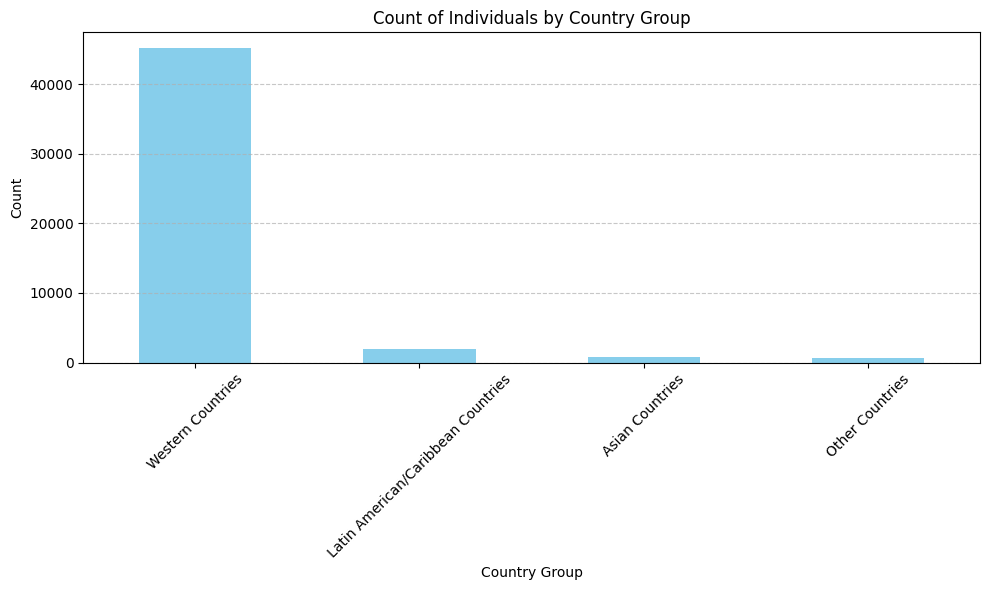

In [51]:
# Get the count of each group
country_group_counts = df_features['country_group'].value_counts()

# Visualize the count
plt.figure(figsize=(10, 6))
country_group_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Individuals by Country Group')
plt.xlabel('Country Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Occupation class Grouping

In [52]:
# Define the mapping of occupations to categories
occupation_mapping = {
    'Adm-clerical': 'Admin',
    'Exec-managerial': 'Managerial',
    'Handlers-cleaners': 'Blue-collar',
    'Prof-specialty': 'Professional',
    'Other-service': 'Service',
    'Sales': 'Sales',
    'Craft-repair': 'Blue-collar',
    'Transport-moving': 'Blue-collar',
    'Farming-fishing': 'Blue-collar',
    'Machine-op-inspct': 'Blue-collar',
    'Tech-support': 'Technical',
    'Protective-serv': 'Service',
    'Armed-Forces': 'Military',
    'Priv-house-serv': 'Service'
}

# Map the occupations to categories and create a new column
df_features['occupation_category'] = df_features['occupation'].map(occupation_mapping)

# Display the first few rows to verify the new column
print(df_features[['occupation', 'occupation_category']].head())

          occupation occupation_category
0       Adm-clerical               Admin
1    Exec-managerial          Managerial
2  Handlers-cleaners         Blue-collar
3  Handlers-cleaners         Blue-collar
4     Prof-specialty        Professional


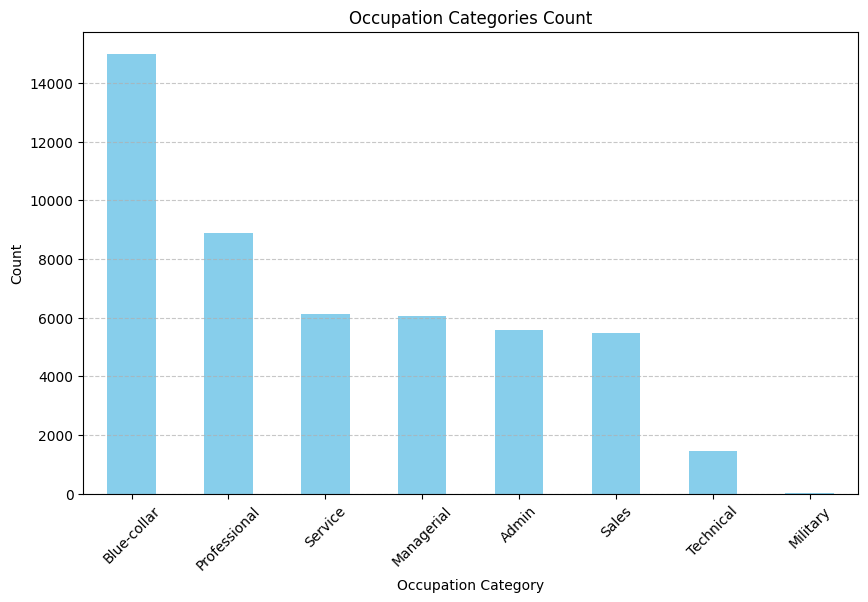

In [53]:
# Get the count of each category
occupation_category_counts = df_features['occupation_category'].value_counts()

# Plot the count of each category
plt.figure(figsize=(10, 6))
occupation_category_counts.plot(kind='bar', color='skyblue')
plt.title('Occupation Categories Count')
plt.xlabel('Occupation Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
for column in df_features.columns:
  p = df_features[column].unique()

  print("Column: ", column)
  print(p)
  print()

Column:  age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 27 67 33 76 17 55 61 70 64 71 68 66
 51 58 26 60 75 65 77 62 63 72 74 69 73 78]

Column:  workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Column:  fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

Column:  education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Column:  education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Column:  marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Column:  occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' '

### Dropping the Grouped Columns

In [55]:
# List of columns to drop
columns_to_drop = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country']

# Drop the columns
df_features.drop(columns=columns_to_drop, inplace=True)

In [56]:
for column in df_features.columns:
  p = df_features[column].unique()

  print("Column: ", column)
  print(p)
  print()

Column:  age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 27 67 33 76 17 55 61 70 64 71 68 66
 51 58 26 60 75 65 77 62 63 72 74 69 73 78]

Column:  fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

Column:  education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Column:  race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Column:  sex
['Male' 'Female']

Column:  capital-gain
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2354  5455 15020  1424  3273 22040  4416
  3908 10566  4931  1086  7430  6497   114  7896  2346  3418  3432  2907
  1151  2

# Label Encoding

In [57]:
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['workclass_group', 'education_group', 'marital_status_group',
                       'race', 'sex', 'income',
                       'relationship_group', 'country_group', 'occupation_category']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df_features[column] = label_encoder.fit_transform(df_features[column])

# Check the updated DataFrame
print(df_features.head())

   age  fnlwgt  education-num  race  sex  capital-gain  capital-loss  \
0   39   77516             13     4    1          2174             0   
1   50   83311             13     4    1             0             0   
2   38  215646              9     4    1             0             0   
3   53  234721              7     2    1             0             0   
4   28  338409             13     2    0             0             0   

   hours-per-week  income  workclass_group  education_group  \
0              40       0                0                0   
1              13       0                2                0   
2              40       0                2                1   
3              40       0                2                1   
4              40       0                2                0   

   marital_status_group  relationship_group  country_group  \
0                     1                   1              3   
1                     0                   0              3   
2 

In [58]:
for column in df_features.columns:
  p = df_features[column].unique()

  print("Column: ", column)
  print(p)
  print()

Column:  age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 27 67 33 76 17 55 61 70 64 71 68 66
 51 58 26 60 75 65 77 62 63 72 74 69 73 78]

Column:  fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

Column:  education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Column:  race
[4 2 1 0 3]

Column:  sex
[1 0]

Column:  capital-gain
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2354  5455 15020  1424  3273 22040  4416
  3908 10566  4931  1086  7430  6497   114  7896  2346  3418  3432  2907
  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848  3887  5721
  95

# Correlation of Features

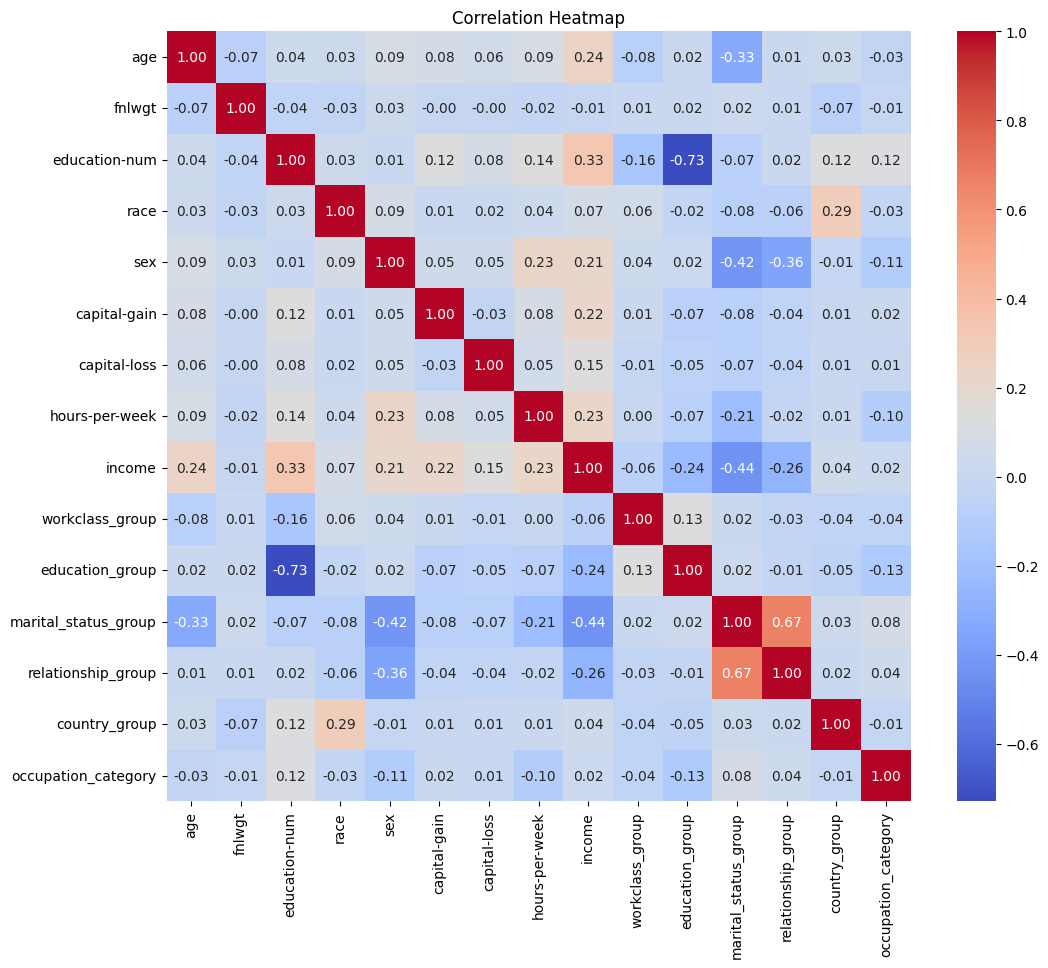

In [59]:
# Correlation matrix
corr = df_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [60]:
# Combine 'marital_status_group' and 'relationship_group'
df_features['marriage_relationship_group'] = df_features['marital_status_group'] + df_features['relationship_group']

# Drop the individual columns if needed
df_features.drop(['marital_status_group', 'relationship_group'], axis=1, inplace=True)

# Display the DataFrame
print(df_features.head())

   age  fnlwgt  education-num  race  sex  capital-gain  capital-loss  \
0   39   77516             13     4    1          2174             0   
1   50   83311             13     4    1             0             0   
2   38  215646              9     4    1             0             0   
3   53  234721              7     2    1             0             0   
4   28  338409             13     2    0             0             0   

   hours-per-week  income  workclass_group  education_group  country_group  \
0              40       0                0                0              3   
1              13       0                2                0              3   
2              40       0                2                1              3   
3              40       0                2                1              3   
4              40       0                2                0              1   

   occupation_category  marriage_relationship_group  
0                    0                      

## Checking Correalations Again

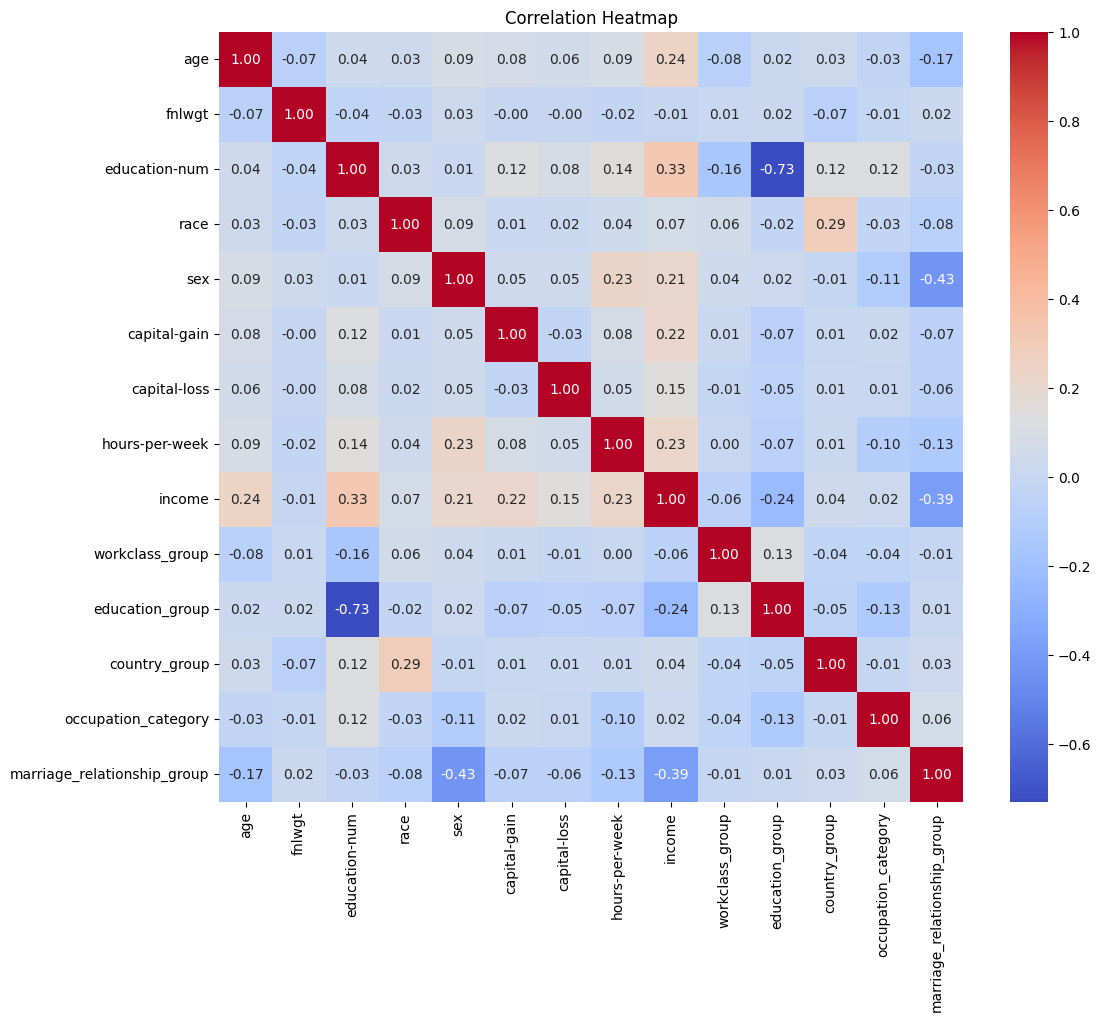

In [61]:
# Correlation matrix
corr = df_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Dropping the fnlwgt column

In [62]:
df_features.drop(columns=['fnlwgt'], inplace=True)

**Normalization or Standadization is not needed for the Model's Using for the project**

## Checking class imbalance

In [63]:
income_counts = df_features['income'].value_counts()
print(income_counts)

0    36932
1    11643
Name: income, dtype: int64


# Over Sampling

In [64]:
# Separate features and target variable
x = df_features.drop('income', axis=1)
y = df_features['income']

# Apply SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Count the class distribution after oversampling
print(y_resampled.value_counts())

0    36932
1    36932
Name: income, dtype: int64


In [65]:
# Saving the Dataframe
df_features.to_csv('pre_rocessed_data.csv', index=False)